In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import IPython.display
import os
from scipy import stats
import math
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
# import files
df_sales_train = pd.read_csv("sales_train_v2.csv")
df_items = pd.read_csv("items.csv")
df_items_category = pd.read_csv("item_categories.csv")
df_shops = pd.read_csv("shops.csv")
df_test = pd.read_csv("test.csv")

In [8]:
df_sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [9]:
list_filenames = [df_sales_train, df_items, df_items_category, df_shops, df_test]
list_filenames_str = ['df_sales_train', 'df_items', 'df_items_category', 'df_shops', 'df_test']

### Print the heads of the loaded files

In [10]:
print("Sales Train Data")
display(df_sales_train.tail())
print("Amount of rows: {}".format(len(df_sales_train)))
print("----------------------------------------------------------")
print(" ")
print("Items Data")
display(df_items.head())
print("Amount of rows: {}".format(len(df_items)))
print("----------------------------------------------------------")
print(" ")
print("Items in Categories")
display(df_items_category.head())
print("Amount of rows: {}".format(len(df_items_category)))
print("----------------------------------------------------------")
print(" ")
print("Shops Data")
display(df_shops.head())
print("Amount of rows: {}".format(len(df_shops)))
print("----------------------------------------------------------")
print(" ")
print("Test Data")
display(df_test.head())
print("Amount of rows: {}".format(len(df_test)))

Sales Train Data


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


Amount of rows: 2935849
----------------------------------------------------------
 
Items Data


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


Amount of rows: 22170
----------------------------------------------------------
 
Items in Categories


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Amount of rows: 84
----------------------------------------------------------
 
Shops Data


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Amount of rows: 60
----------------------------------------------------------
 
Test Data


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


Amount of rows: 214200


#### Notes on data sets
sales_train
- sales_train data set the most relevant, cause it contains the relevant information for training
- sales per product and shop (item_cnt_day) on a daily base presented
- some negative values which could be returns
- the price of the products which could also vary depending on sales etc.
- data_block_num is ID per month for easier aggregation
- item_id shows the id of the sold (or returned) item, which is the most relevant for the analysis
- amount of rows long with 2935849 (sales data from 33 months)
- most relevant file <b>FOKUS DATA SET </b>

item data
- just a list of the item name, its id and to which category it belongs
- can be relevant for clustering according to categories

item in categories
- shows the names of the categories and their ID
- 84 categories exist

shops data
- we see that there are 60 shops
- name and shop_id tuple are shown here

test data
- the dataset on which will be tested
- shows shop_id - item_id tuples -> which shops sells which item in month November 2015


In [11]:
# check for duplicates
count = 0
for element in list_filenames:
    name = list_filenames_str[count]
    double = element.duplicated()
    print ("There are {} duplicate rows in the {} data set. ".format(len(element[element.duplicated()]), name))
    count += 1

There are 6 duplicate rows in the df_sales_train data set. 
There are 0 duplicate rows in the df_items data set. 
There are 0 duplicate rows in the df_items_category data set. 
There are 0 duplicate rows in the df_shops data set. 
There are 0 duplicate rows in the df_test data set. 


In [12]:
# duplicate rows in df_sales_train
display(df_sales_train[df_sales_train.duplicated(keep=False)])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
76962,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0


In [13]:
# check if NaN values in data sets
count = 0
for element in list_filenames:
    name = list_filenames_str[count]
    if element.isnull().values.any() == False:
        print("There are no NaN-values in the {} data set.". format(name))
    else:
        print("there are NaN values in the {} data set.". format(name))
    count += 1

There are no NaN-values in the df_sales_train data set.
There are no NaN-values in the df_items data set.
There are no NaN-values in the df_items_category data set.
There are no NaN-values in the df_shops data set.
There are no NaN-values in the df_test data set.


### Sales per month

In [14]:
# print list of items sold per month
df_sales_month = df_sales_train.groupby(['date_block_num'])['item_cnt_day'].sum()

# sales per month per product sum
#df_sales_train.groupby(['date_block_num','item_id'])['item_cnt_day'].sum()
#df_sales_month[:4]

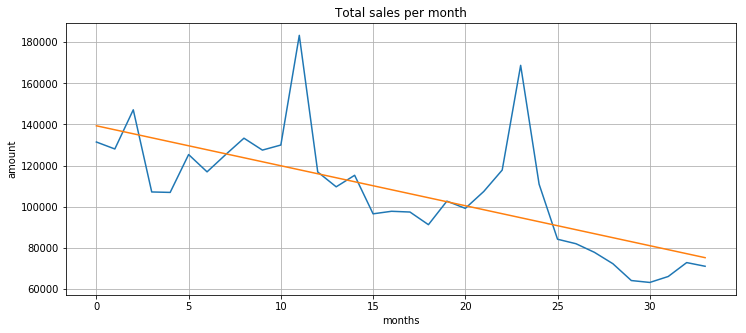

In [15]:
# plot total sales per month


months = range((len(df_sales_month)))
# Generated linear fit
# source: https://plot.ly/matplotlib/linear-fits/
slope, intercept, r_value, p_value, std_err = stats.linregress(months, df_sales_month)
line = slope*months+intercept

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(months, df_sales_month, line)
ax.set(xlabel='months', ylabel='amount',
       title='Total sales per month')
ax.grid()

fig.savefig("total_sales_month.png")
plt.show()

### Sales per product in time

In [16]:
# how long is which product being sold

item_sales_month = df_sales_train.sort_values(by=['item_id', 'date_block_num'])
item_sales_month = item_sales_month.drop(["date", "shop_id", "item_price"], axis=1)
item_sales_month = item_sales_month[['item_id','date_block_num', 'item_cnt_day']]
item_sales_month.reset_index(drop=True, inplace= True)
item_sales_month.head(10)

,item_id,date_block_num,item_cnt_day
0,0,20,1.0
1,1,15,1.0
2,1,15,1.0
3,1,18,1.0
4,1,19,1.0
5,1,20,1.0
6,1,21,1.0
7,2,19,1.0
8,2,22,1.0
9,3,18,1.0


In [17]:
# pivot table for easier analysis
# table with rows = item_id, columns = months, values = item_cnt_day
table_items = df_sales_train.pivot_table(values = ['item_cnt_day'], index = ['item_id'], columns = ['date_block_num'], 
                    aggfunc=np.sum, fill_value=0).reset_index()
table_items.columns = table_items.columns.droplevel().map(str)
table_items = table_items.reset_index(drop=True).rename_axis(None, axis=1)
table_items.columns.values[0] = 'item_id'
table_items

,item_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### rows with negative sales

In [18]:
# rows with negative sales amounts -> probably returns

#len(item_sales_month[item_sales_month.loc[:,'item_cnt_day'] <= 0.0])
print("There are {} rows with negative item_cnt_day, which stand for returns." 
      .format(len(item_sales_month[item_sales_month.loc[:,'item_cnt_day'] <= 0.0])))

#item_sales_month[item_sales_month.loc[:,'item_cnt_day'] <= 0.0].min()
#item_sales_month[item_sales_month.loc[:,'item_cnt_day'] <= 0.0].max()

There are 7356 rows with negative item_cnt_day, which stand for returns.


In [19]:
# amount of different items
len(df_items["item_id"].unique())

22170

### products which haven't been sold in the last 6 months (train and test set)

In [20]:
# products which haven't been sold in the last 6 months

old_products = table_items[table_items.loc[:,'28':].sum(axis=1)==0] 
print("Number of old products: {} (= {}% of all products)".format(len(old_products), 
                                                                (round(len(old_products)/len(df_items)*100, 2))))
print("These products will be predicted with 0.")


Number of old products: 12894 (= 58.16% of all products)
These products will be predicted with 0.


In [21]:
# old_products in test data
print("Old products in test file: {}".format(len(df_test[df_test['item_id'].isin(old_products['item_id'])])))

Old products in test file: 7812


## Outlier analysis

In [22]:
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


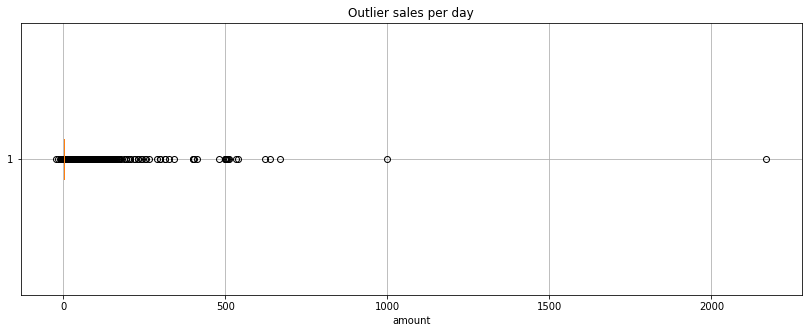

In [23]:
# outlier detection of item amounts 


sales_day = df_sales_train['item_cnt_day']#df_sales_train['item_id'][df_sales_train['item_cnt_day']>300]


fig, ax = plt.subplots(figsize=(14, 5))
ax.boxplot(sales_day, vert=False)
ax.set(xlabel='amount', title='Outlier sales per day')
ax.grid()


fig.savefig("boxplot_outlier_sales.png")
#plt.show()

### sales per shop

In [24]:
# pivot table for shop sales

# table with rows = item_id, columns = months, values = item_cnt_day
table_shops = df_sales_train.pivot_table(values = ['item_cnt_day'], index = ['shop_id'], columns = ['date_block_num'], 
                    aggfunc=np.sum, fill_value=0).reset_index()
table_shops.columns = table_shops.columns.droplevel().map(str)
table_shops = table_shops.reset_index(drop=True).rename_axis(None, axis=1)
table_shops.columns.values[0] = 'shop_id'

table_shops

,shop_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,5578,6127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2947,3364,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1146,488,753,583,553,832,807,875,945,...,987,907,762,859,843,804,785,942,822,727
3,3,767,798,959,647,710,784,721,890,1026,...,977,738,741,740,731,672,535,666,745,613
4,4,2114,2025,2060,285,1211,1464,1378,1713,1536,...,1188,980,978,899,893,793,842,947,732,831
5,5,0,877,1355,1008,1110,1393,1265,1510,1298,...,1404,1101,1109,1054,1012,954,991,1294,1092,1052
6,6,3686,4007,4519,3168,3022,3847,3360,3702,4208,...,2328,2329,1981,1998,1748,1539,1484,1575,1725,1802
7,7,2495,2513,2460,1540,1647,2085,2031,2397,2599,...,2084,1847,1430,1340,1217,1235,1327,1409,1287,1212
8,8,1463,1156,977,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,3186


In [25]:
# shops which haven't sold anything in the last 6 months -> assumption closed shops
# print amount and list of old shops
old_shops = table_shops[table_shops.loc[:,'28':].sum(axis=1)==0] 
names_old_shops = old_shops['shop_id']
print("There are {} shops which haven't sold anything in the last 6 months.". format(len(old_shops)))
print("The shop IDs are: {}".format(names_old_shops.values))

There are 13 shops which haven't sold anything in the last 6 months.
The shop IDs are: [ 0  1  8 11 13 17 23 30 32 33 40 43 54]


In [26]:
# closed shops in test data set?
print("Closed shops in test file: {}".format(len(df_test[df_test['shop_id'].isin(names_old_shops.values)])))

Closed shops in test file: 0


In [27]:
# new shops
new_shops = table_shops[table_shops.loc[:,'1':'31'].sum(axis=1)==0]
print(new_shops)

    shop_id  0  1  2  3  4  5  6  7  8 ...   24  25  26  27  28  29  30  31  \
36       36  0  0  0  0  0  0  0  0  0 ...    0   0   0   0   0   0   0   0   

    32   33  
36   0  330  

[1 rows x 35 columns]


### analyzing shop names

In [28]:
# comparison of similarity in shop names
import jellyfish
shop_names = df_shops['shop_name']
count1 = 0
for elem in shop_names:
    count2 = 0
    for elem2 in shop_names:
        scores =round(jellyfish.jaro_distance(elem, elem2),4)
        if scores > 0.9:
            if scores < 1.0:
#                print("Element pair: {} and {} with score {} and pair {}-{}".format(elem, 
#                                                                                    elem2, 
#                                                                                    scores, 
#                                                                                    count1, 
#                                                                                    count2))
                print("Shop pair: {}-{}".format(count1, count2))
                
        count2 +=1
    count1 +=1


Shop pair: 0-57
Shop pair: 1-58
Shop pair: 10-11
Shop pair: 11-10
Shop pair: 23-24
Shop pair: 24-23
Shop pair: 39-40
Shop pair: 40-39
Shop pair: 57-0
Shop pair: 58-1


In [29]:
'''# translation of the shop names for a better understanding of the similarities
from googletrans import Translator
translator = Translator()

counter = 0
shop_names_en = pd.Series()
for elem in shop_names:
    translation = translator.translate(elem)
    print("shop {}: {} -> {}".format(counter, elem, translation.text))
    print("---------------------------------------")
    counter +=1
    string = translation.text
    shop_names_en = shop_names_en.append(pd.Series(string))
'''

'# translation of the shop names for a better understanding of the similarities\nfrom googletrans import Translator\ntranslator = Translator()\n\ncounter = 0\nshop_names_en = pd.Series()\nfor elem in shop_names:\n    translation = translator.translate(elem)\n    print("shop {}: {} -> {}".format(counter, elem, translation.text))\n    print("---------------------------------------")\n    counter +=1\n    string = translation.text\n    shop_names_en = shop_names_en.append(pd.Series(string))\n'

### analysis of test dataset

In [30]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [31]:
len(df_test)

214200

In [32]:
# compare shop-item pairs from test data and train dataset

sales_pairs = df_test.merge(df_sales_train, on=['item_id','shop_id'], how='left').dropna()
valid_pairs = df_test[df_test['ID'].isin(sales_pairs['ID'])]

print(len(valid_pairs))

111404


In [33]:
# items in test data set which are not in the training dataset 

lonely_items = df_test[~(df_test['item_id'].isin(df_sales_train['item_id']))]
print(len(lonely_items))

15246


In [34]:
# amount of shop - item pairs where we have pairs in the testset which are not in the training set 
# and where we have a new item id

len(df_test) - len(valid_pairs) - len(lonely_items)

87550

## Preprocessing

In [35]:
# create pivot table out of df_sales_train
dataset_train = df_sales_train.pivot_table(index=['item_id', 'shop_id'],values=['item_cnt_day'], columns='date_block_num', fill_value=0)

In [36]:
# merge of training data with test data to be able to predict everything required
dataset = pd.merge(df_test, dataset_train, on=['shop_id', 'item_id'], how='left')
dataset = dataset.fillna(0)
print("Length of the data set: {} lines".format(len(dataset)))
print("Length of the test set: {} lines".format(len(df_test)))
dataset.head()

/home/stephan/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


Length of the data set: 214200 lines
Length of the test set: 214200 lines


,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# check for 0 rows
# 102861 exist
null_rows = dataset[dataset.iloc[:,3:].sum(axis=1)==0] 
null_rows.shape
id_null_rows = null_rows.iloc[:,0]
dataset_short = dataset.drop(id_null_rows)
testset_short = df_test.drop(id_null_rows)
print(len(dataset_short), len(testset_short))

111339 111339


## linear regression model

In [47]:
# input set preparation for lin reg
X_train = dataset[['shop_id', 'item_id']]
y_train = dataset.iloc[:, 3:].values
X_train.head()
X_test = df_test [['shop_id', 'item_id']]

In [48]:
# train lnear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train,y_train)

0.0007075681090384045

In [49]:
# predict with linear regression model
prediction = reg.predict(X_test)
#print(prediction[:,1])
prediction.shape

(214200, 34)

In [50]:
# display content
first_col = prediction[:,0]
print(type(first_col), len(first_col))
print(prediction.shape)

<class 'numpy.ndarray'> 214200
(214200, 34)


### write results in csv-file

In [35]:
prediction_df = pd.DataFrame(df_test['ID'])
prediction_df.columns = ['ID']
prediction_df.insert(1, "item_cnt_month", first_col, True) 
#prediction_df.head()
prediction_df.to_csv('predictions/lin_reg_pred.csv', header=True, index=False)
print("Predictions written into csv file")

Predictions written into csv file


In [36]:
# stats on the predictions
print(prediction_df.describe())

                  ID  item_cnt_month
count  214200.000000   214200.000000
mean   107099.500000        0.039069
std     61834.358168        0.008151
min         0.000000        0.019818
25%     53549.750000        0.033008
50%    107099.500000        0.039113
75%    160649.250000        0.044846
max    214199.000000        0.058795


## XGBoost

In [44]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
#basic input for this algorithm: dataset
X_train = dataset[['shop_id', 'item_id']]
y_train = dataset.iloc[:, 3:].values
X_train.head()
X_test = df_test [['shop_id', 'item_id']]

In [39]:
reg_xgb = xgb.XGBRegressor()
reg_xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train)],
        early_stopping_rounds=50,
       verbose=True) 

E:\Stephan\Anaconda\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[0]	validation_0-rmse:0.464949
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.428176
[2]	validation_0-rmse:0.395893
[3]	validation_0-rmse:0.367682
[4]	validation_0-rmse:0.343113
[5]	validation_0-rmse:0.321883
[6]	validation_0-rmse:0.303487
[7]	validation_0-rmse:0.287784
[8]	validation_0-rmse:0.274324
[9]	validation_0-rmse:0.262972
[10]	validation_0-rmse:0.253344
[11]	validation_0-rmse:0.245297
[12]	validation_0-rmse:0.238497
[13]	validation_0-rmse:0.232842
[14]	validation_0-rmse:0.228184
[15]	validation_0-rmse:0.224298
[16]	validation_0-rmse:0.221134
[17]	validation_0-rmse:0.218431
[18]	validation_0-rmse:0.216278
[19]	validation_0-rmse:0.21451
[20]	validation_0-rmse:0.213039
[21]	validation_0-rmse:0.21186
[22]	validation_0-rmse:0.2109
[23]	validation_0-rmse:0.210077
[24]	validation_0-rmse:0.20943
[25]	validation_0-rmse:0.208875
[26]	validation_0-rmse:0.208427
[27]	validation_0-rmse:0.208074
[28]	validation_0-rmse:0.207766
[29]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [40]:
# predict
X_test_xgb = reg_xgb.predict(X_test)

In [41]:
# write prediction in csv file
prediction_df = pd.DataFrame(df_test['ID'])
prediction_df.columns = ['ID']
prediction_df.insert(1, "item_cnt_month", X_test_xgb, True) 
#prediction_df.head()
prediction_df.to_csv('predictions/xgboost_pred.csv', header=True, index=False)
print("Predictions written into csv file")

Predictions written into csv file


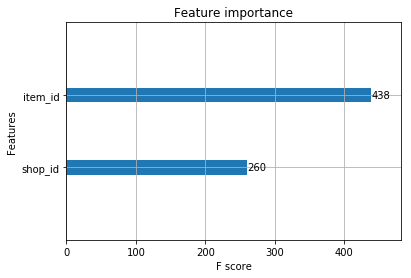

In [42]:
# plot feature importance on the predictions
_ = plot_importance(reg_xgb)

In [43]:
# calculate RMSE with linear regression prediction
print("RMSE between linear regression and xgboost is {}"
      .format(round(math.sqrt(mean_squared_error (y_true = first_col, y_pred = X_test_xgb)),4)))

RMSE between linear regression and xgboost is 0.0359


## adaboost

In [39]:
from sklearn.ensemble import AdaBoostRegressor

In [40]:
#basic input for this algorithm: dataset
X_train = dataset[['shop_id', 'item_id']]
y_train = dataset.iloc[:, 36:37].values
X_train.head()
X_test = df_test [['shop_id', 'item_id']]

In [42]:
reg_ada = AdaBoostRegressor(random_state=42)
reg_ada.fit(X_train, y_train)
X_test_ada = reg_ada.predict(X_test)

/home/stephan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
# calculate RMSE with linear regression prediction
print("RMSE between linear regression and adaboost is {}"
      .format(round(math.sqrt(mean_squared_error (y_true = first_col, y_pred = X_test_ada)),4)))

RMSE between linear regression and adaboost is 1.1145


In [52]:
# write prediction in csv file
prediction_df = pd.DataFrame(df_test['ID'])
prediction_df.columns = ['ID']
prediction_df.insert(1, "item_cnt_month", X_test_ada, True) 
#prediction_df.head()
prediction_df.to_csv('predictions/adaboost_pred.csv', header=True, index=False)
print("Predictions written into csv file")

Predictions written into csv file


## LSTM

In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


In [50]:
# specific preprocessing needed due to data structure of LSTM
# inspiration by https://www.kaggle.com/john850512/predict-future-sales-lstm

dataset = dataset.drop(['shop_id', 'item_id', 'ID'], axis=1)

X_train = np.expand_dims(dataset.values[:, :-1], axis=2)
y_train = dataset.values[:, -1:]
X_test = np.expand_dims(dataset.values[:, 1:], axis=2)
print(X_train.shape, y_train.shape, X_test.shape)


(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [51]:
lstm_model = Sequential()
lstm_model.add(LSTM(units = 32, input_shape=(33, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mse',
              optimizer='adam',
              metrics=['mean_squared_error'])
lstm_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [52]:
# training of lstm
history = lstm_model.fit(X_train, y_train, batch_size=2048, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
214200/214200 [==============================] - 7s 32us/step - loss: 1.3708 - mean_squared_error: 1.3708
Epoch 2/5
214200/214200 [==============================] - 6s 28us/step - loss: 1.3666 - mean_squared_error: 1.3666
Epoch 3/5
214200/214200 [==============================] - 6s 28us/step - loss: 1.3638 - mean_squared_error: 1.3638
Epoch 4/5
214200/214200 [==============================] - 6s 28us/step - loss: 1.3595 - mean_squared_error: 1.3595
Epoch 5/5
214200/214200 [==============================] - 6s 28us/step - loss: 1.3636 - mean_squared_error: 1.3636


In [53]:
#predict
X_test_LSTM = lstm_model.predict(X_test)

In [54]:
# calculate MSE with linear regression prediction
print("RMSE between linear regression and lstm is {}"
      .format(round(math.sqrt(mean_squared_error (y_true = first_col, y_pred = X_test_LSTM)),4)))

RMSE between linear regression and lstm is 0.1881


In [55]:
# write prediction in csv file
prediction_df = pd.DataFrame(df_test['ID'])
prediction_df.columns = ['ID']
prediction_df.insert(1, "item_cnt_month", X_test_LSTM, True) 
#prediction_df.head()
prediction_df.to_csv('predictions/lstm_pred.csv', header=True, index=False)
print("Predictions written into csv file")

Predictions written into csv file


In [56]:
print("min: {} and max: {} of lstm prediction".format(X_test_LSTM.min(), X_test_LSTM.max()))

min: -0.030855268239974976 and max: 5.298534393310547 of lstm prediction
